In [1]:
import pandas
import sklearn

In [2]:
Tweets=pandas.read_csv('Tweets.csv')
Tweets.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
Tweets.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [4]:
from sklearn import model_selection #model selection helps to split our data into training and testing
#split to 30% testing and 70% training
X_train,X_test,Y_train,Y_test =model_selection.train_test_split(Tweets['text'],Tweets['airline_sentiment'],test_size=0.3,random_state=42)
#x=column test and Y =column airline_sentiment
Y_test

4794     positive
10480    negative
8067     negative
8880      neutral
8292     negative
           ...   
12156    positive
6518      neutral
2245     negative
4165     negative
11671    negative
Name: airline_sentiment, Length: 4392, dtype: object

In [5]:
#removing common words from X_train or X-test and putting the data into numerical representation for machine learning using a module in sklearn called CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer #countvectorizer is used to convert text documents into numerical representation based on word frequencies

vectorizer=CountVectorizer(lowercase=True,stop_words='english') #putting our text into lowercase and removing common words from the text

X_train_new=vectorizer.fit_transform(X_train)#we are going to fit and transform our X_train,transform converts documents to numerical representation output
X_train_new

<10248x12061 sparse matrix of type '<class 'numpy.int64'>'
	with 93480 stored elements in Compressed Sparse Row format>

In [6]:
#pass our new X_train data to an algorithm model
from sklearn.linear_model import LogisticRegression,SGDRegressor,SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor

model=LogisticRegression()
model.fit(X_train_new,Y_train)

LogisticRegression()

In [7]:
#test the model, first we vectorize our data
X_test_new=vectorizer.transform(X_test)#converting X_test data to numerical rep and storing it to var x_test_new
#pass our new X_test to the model to make predictions
prediction=model.predict(X_test_new)
prediction
print(Tweets.groupby('airline_sentiment').size())

airline_sentiment
negative    9178
neutral     3099
positive    2363
dtype: int64


In [8]:
#get the sample dataset
sample=pandas.read_csv('sample.csv')
sample

,Text
0,your airline is awesome but your lax loft need...
1,"not worried, it's been a great ride in a new p..."
2,awesome. I flew yall Sat morning. Any way we c...
3,"Hi, Virgin! I'm on hold for 40-50 minutes -- a..."
4,"Hi, Virgin, I like your services"
5,"Your services are bad, its not as expected"
6,Its very unfortunate that I did not get what I...
7,"This is not good, improve!"
8,I waited for 40 minutes but we left though
9,"this is very nice, I enjoyed"


In [9]:
#use the model to predict above clients sentiments
#first thing is to vectorize our data
new_sample=vectorizer.transform(sample['Text'])
outcome=model.predict(new_sample)
print('The new comments sentiment prediction are:', outcome)

#we will put the output predictions into a Dataframe(tabular format)
outcome_table=pandas.DataFrame(outcome,columns=['Sentiments'])
outcome_table

The new comments sentiment prediction are: ['negative' 'positive' 'positive' 'neutral' 'neutral' 'negative' 'neutral'
 'positive' 'negative' 'positive' 'negative' 'neutral']


,Sentiments
0,negative
1,positive
2,positive
3,neutral
4,neutral
5,negative
6,neutral
7,positive
8,negative
9,positive


In [10]:
results=sample.merge(outcome_table,left_index=True,right_index=True)
results

,Text,Sentiments
0,your airline is awesome but your lax loft need...,negative
1,"not worried, it's been a great ride in a new p...",positive
2,awesome. I flew yall Sat morning. Any way we c...,positive
3,"Hi, Virgin! I'm on hold for 40-50 minutes -- a...",neutral
4,"Hi, Virgin, I like your services",neutral
5,"Your services are bad, its not as expected",negative
6,Its very unfortunate that I did not get what I...,neutral
7,"This is not good, improve!",positive
8,I waited for 40 minutes but we left though,negative
9,"this is very nice, I enjoyed",positive


/home/user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


<Axes: xlabel='Sentiments', ylabel='count'>

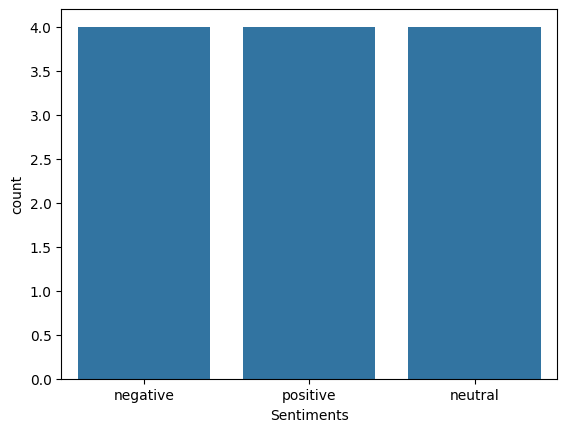

In [11]:
import matplotlib as plt
import seaborn as sns
sns.countplot(x='Sentiments',data=results)

<Axes: >

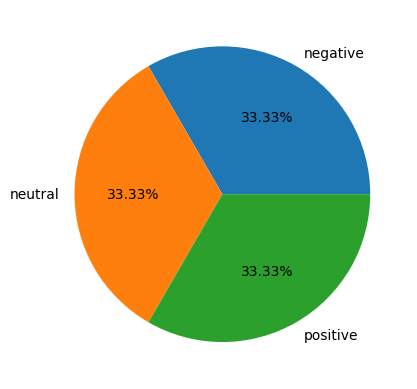

In [12]:
results.groupby('Sentiments').size().plot(kind='pie',autopct='%1.2F%%')

In [13]:
#printing positive sentiments only
positive=results[results['Sentiments']=='positive']
positive
negative=results[results['Sentiments']=='negative']
negative
neutral=results[results['Sentiments']=='neutral']
neutral

,Text,Sentiments
3,"Hi, Virgin! I'm on hold for 40-50 minutes -- a...",neutral
4,"Hi, Virgin, I like your services",neutral
6,Its very unfortunate that I did not get what I...,neutral
11,I enjoyed my journey on this flight,neutral
